<a href="https://colab.research.google.com/github/SwathyKrishna02/Car_details/blob/main/Indian_cars_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure

In [133]:
data = pd.read_csv("/content/cars_ds_final.csv")
data

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [134]:
data.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Descriptive Statistics

In [135]:
data.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [136]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [137]:
mean_values = data.mean()
print("Mean:")
print(mean_values)

Mean:
Cylinders              4.380992
Valves_Per_Cylinder    3.977853
Doors                  4.550314
Seating_Capacity       5.270079
Number_of_Airbags      3.787029
USB_Ports              1.793103
dtype: float64


<ipython-input-137-d89d702b5d78>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = data.mean()


In [138]:
median_values = data.median()
print("Median:")
print(median_values)

Median:
Cylinders              4.0
Valves_Per_Cylinder    4.0
Doors                  5.0
Seating_Capacity       5.0
Number_of_Airbags      2.0
USB_Ports              2.0
dtype: float64


<ipython-input-138-316ed01f1f4e>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = data.median()


In [139]:
mode_values = data.mode().iloc[0]
print("Mode:")
print(mode_values)

Mode:
Make                      Maruti Suzuki
Model                             Nexon
Variant                             Lxi
Ex-Showroom_Price          Rs. 9,99,900
Displacement                    1197 cc
                            ...        
USB_Ports                           1.0
Heads-Up_Display                    Yes
Welcome_Lights                      Yes
Battery                 200 ampere-hour
Electric_Range       110 km/full charge
Name: 0, Length: 140, dtype: object


In [140]:
min_values = data.min()
print("Minimum:")
print(min_values)
max_values = data.max()
print("Maximum:")
print(max_values)

Minimum:
Model                         3-Series
Variant                          1.0 S
Ex-Showroom_Price      Rs. 1,01,44,987
Cylinders                          2.0
Valves_Per_Cylinder                1.0
Fuel_Type                          CNG
Length                         2752 mm
Doors                              2.0
Power                    100PS@3600rpm
Seating_Capacity                   2.0
Number_of_Airbags                  1.0
USB_Ports                          1.0
dtype: object
Maximum:
Model                          Zs Ev
Variant                 Zxi Plus Amt
Ex-Showroom_Price      Rs. 99,00,000
Cylinders                       16.0
Valves_Per_Cylinder             16.0
Fuel_Type                     Petrol
Length                       6092 mm
Doors                            5.0
Power                   99PS@6000rpm
Seating_Capacity                16.0
Number_of_Airbags               14.0
USB_Ports                        3.0
dtype: object


<ipython-input-140-88543eef39e6>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_values = data.min()
<ipython-input-140-88543eef39e6>:4: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  max_values = data.max()


In [141]:
std_deviation_values = data.std()
print("Standard Deviation:")
print(std_deviation_values)

Standard Deviation:
Cylinders              1.660957
Valves_Per_Cylinder    0.833763
Doors                  0.747816
Seating_Capacity       1.145231
Number_of_Airbags      2.522399
USB_Ports              0.773642
dtype: float64


<ipython-input-141-ca4580aa2523>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_deviation_values = data.std()


Understanding Dataset


In [142]:
data.shape

(1276, 140)

In [143]:
data.describe()

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [144]:
data.dtypes

Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
Displacement          object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 140, dtype: object

In [145]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 140 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Make                                       object 
 1    Model                                      object 
 2    Variant                                    object 
 3    Ex-Showroom_Price                          object 
 4    Displacement                               object 
 5    Cylinders                                  float64
 6    Valves_Per_Cylinder                        float64
 7    Drivetrain                                 object 
 8    Cylinder_Configuration                     object 
 9    Emission_Norm                              object 
 10   Engine_Location                            object 
 11   Fuel_System                                object 
 12   Fuel_Tank_Capacity                         object 
 13   Fuel_Type                      

Data Cleaning

In [146]:
data.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

In [147]:
data.isnull().sum().sum()

58433

In [148]:
imputer=SimpleImputer(strategy="most_frequent")


In [149]:
data["Heads-Up_Display"]=imputer.fit_transform(data[['Heads-Up_Display']])
data["Make"]=imputer.fit_transform(data[['Make']])
data["Battery"]=imputer.fit_transform(data[['Battery']])
data["Electric_Range"]=imputer.fit_transform(data[['Electric_Range']])
data["USB_Ports"]=imputer.fit_transform(data[['USB_Ports']])
data["Displacement"]=imputer.fit_transform(data[['Displacement']])
data["Welcome_Lights"]=imputer.fit_transform(data[['Welcome_Lights']])
data.head()


,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,1.0,Yes,Yes,200 ampere-hour,110 km/full charge
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,1.0,Yes,Yes,200 ampere-hour,110 km/full charge
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,1.0,Yes,Yes,200 ampere-hour,110 km/full charge
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,1.0,Yes,Yes,200 ampere-hour,110 km/full charge
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,1.0,Yes,Yes,200 ampere-hour,110 km/full charge


In [150]:
data.isnull().sum()

Make                 0
Model                0
Variant              0
Ex-Showroom_Price    0
Displacement         0
                    ..
USB_Ports            0
Heads-Up_Display     0
Welcome_Lights       0
Battery              0
Electric_Range       0
Length: 140, dtype: int64

In [151]:
data.nunique()

Make                   39
Model                 263
Variant              1064
Ex-Showroom_Price    1179
Displacement          129
                     ... 
USB_Ports               3
Heads-Up_Display        1
Welcome_Lights          1
Battery                 5
Electric_Range          8
Length: 140, dtype: int64

In [152]:
data[data.isnull()].count()

Make                 0
Model                0
Variant              0
Ex-Showroom_Price    0
Displacement         0
                    ..
USB_Ports            0
Heads-Up_Display     0
Welcome_Lights       0
Battery              0
Electric_Range       0
Length: 140, dtype: int64

In [153]:
data.dtypes

Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
Displacement          object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 140, dtype: object

In [154]:
data=data.fillna("")
data=data.replace("","")

In [155]:
data[data.Make=="Tata"].tail()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1141,Tata,Harrier,Revotorq Dark Edition,"Rs. 17,30,755",1956 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,,Yes,,Yes,,1.0,Yes,Yes,200 ampere-hour,110 km/full charge
1187,Tata,Tiago Nrg,1.2L Revotron,"Rs. 5,94,993",1199 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,,,,,,1.0,Yes,Yes,200 ampere-hour,110 km/full charge
1188,Tata,Tiago Nrg,1.05L Revotorq,"Rs. 6,89,993",1047 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,,,,,,1.0,Yes,Yes,200 ampere-hour,110 km/full charge
1189,Tata,Tiago Nrg,1.2L Revotron Amt,"Rs. 6,39,993",1199 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,,,,,,1.0,Yes,Yes,200 ampere-hour,110 km/full charge
1204,Tata,Winger,15S,"Rs. 12,05,000",2200 cc,4.0,,FWD (Front Wheel Drive),V,BS 6,...,,,,,,1.0,Yes,Yes,200 ampere-hour,110 km/full charge


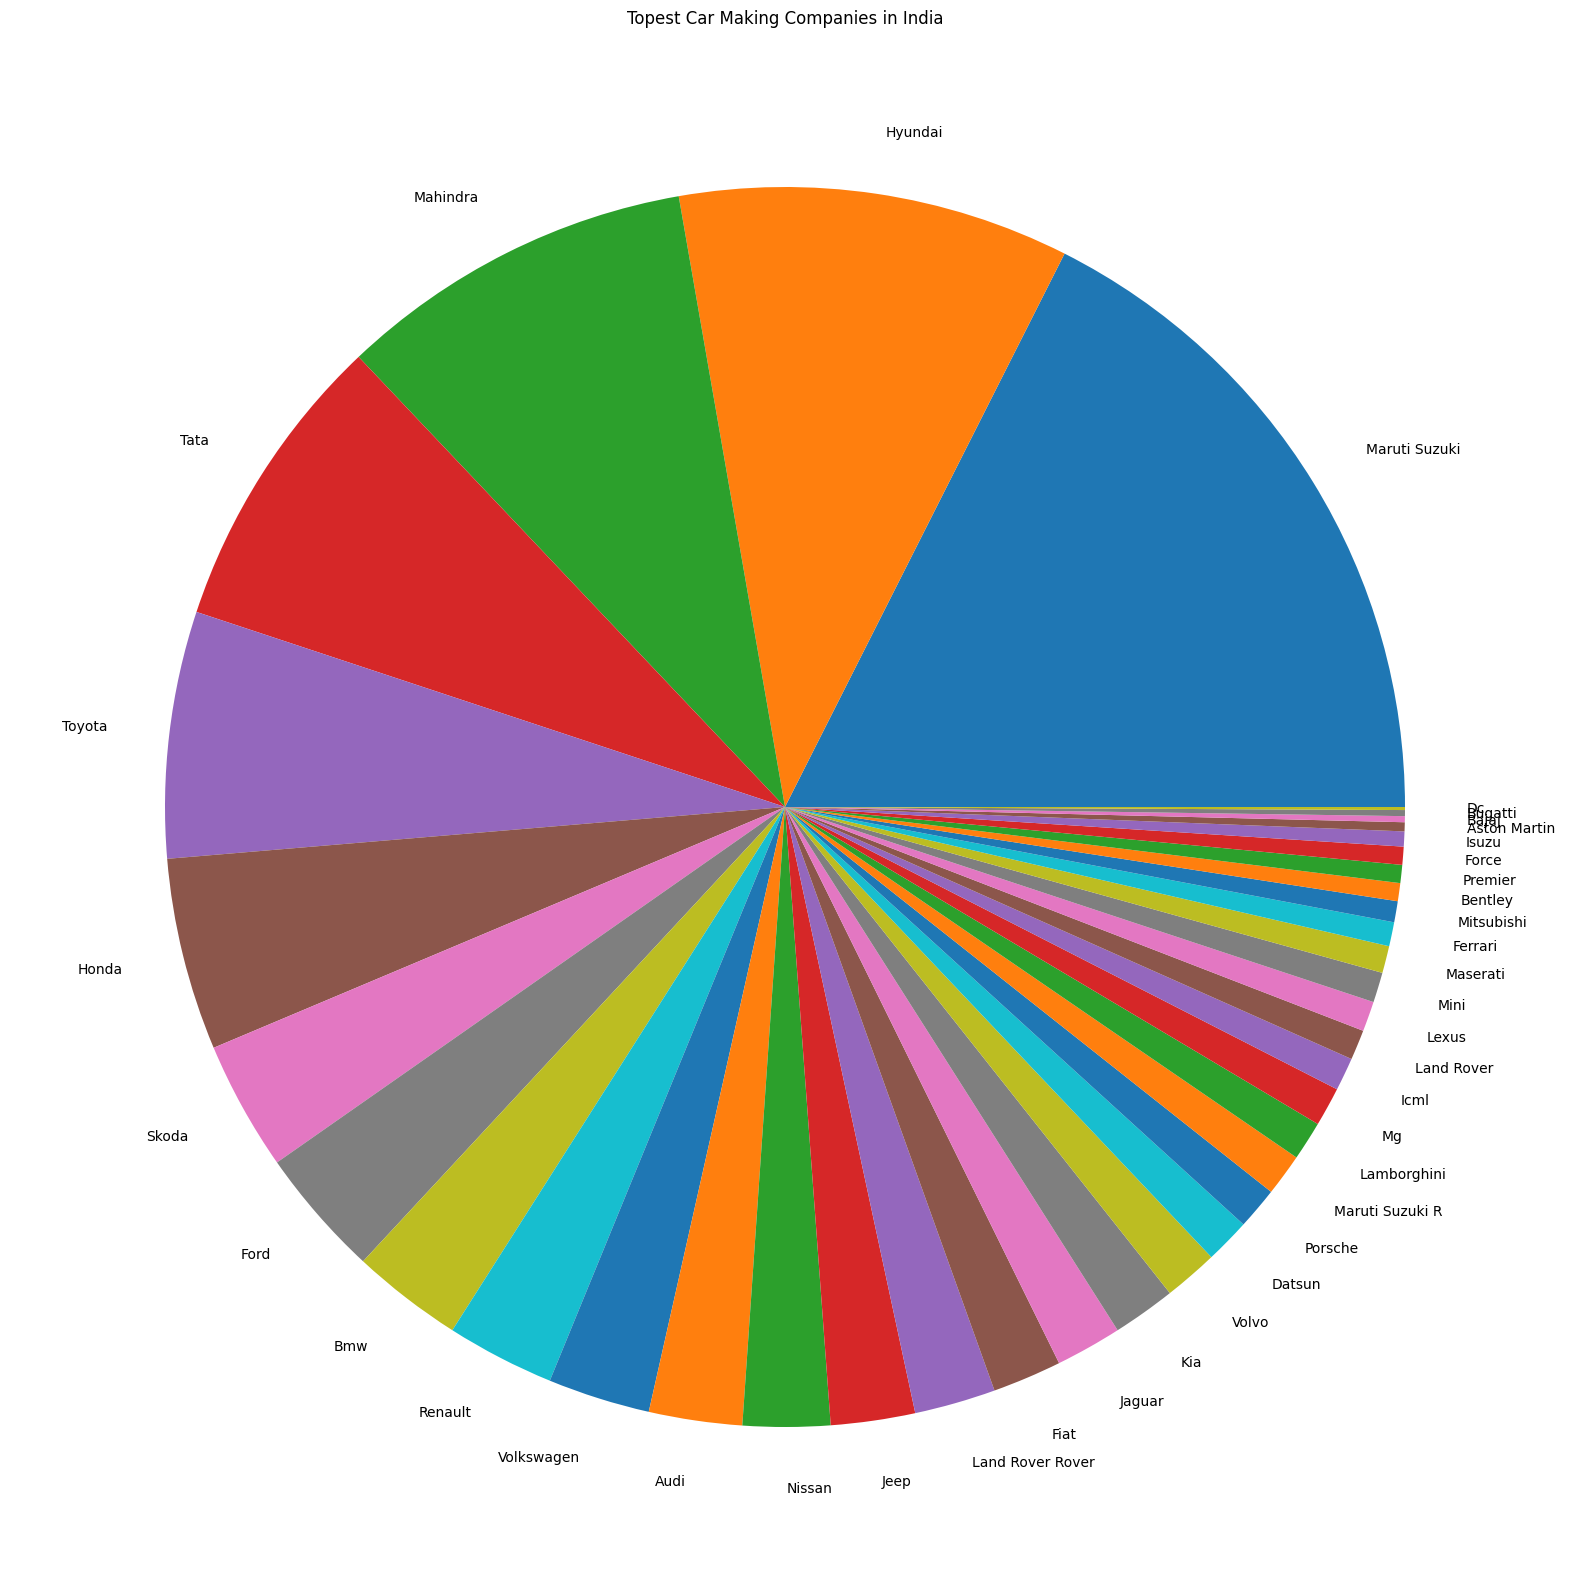

In [156]:
fig = plt.figure(figsize = (20,30))
ax = fig.subplots()
data.Make.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Topest Car Making Companies in India")
plt.show()

In [157]:
data.fillna(data.mean(), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

<ipython-input-157-804b565a5ed4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [158]:
data_types = data.dtypes
print("Data Types:")
print(data_types)

non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:")
print(non_numeric_columns)

Data Types:
Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
Displacement          object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 140, dtype: object
Non-Numeric Columns:
Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Paddle_Shifters', 'Leather_Wrapped_Steering', 'Automatic_Headlamps',
       'Engine_Type', 'ASR_/_Traction_Control', 'Cruise_Control',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=139)


In [159]:
data.rename(columns={'categorical_column': 'new_column_name'}, inplace=True)

In [160]:
if 'date_column' in data.columns:
    data['date_column'] = pd.to_datetime(data['date_column'])

In [161]:
if 'numeric_column' in data.columns:
    data['numeric_column'] = pd.to_numeric(data['numeric_column'], errors='coerce')

In [162]:
data.dtypes

Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
Displacement          object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 140, dtype: object

Histogram

In [185]:
data = pd.DataFrame({
    'numeric_column_1': [10, 15, 30, 25, 30],
    'numeric_column_2': [50, 45, 80, 70, 55],
})

In [186]:
numeric_columns_to_visualize = ['numeric_column_1', 'numeric_column_2']

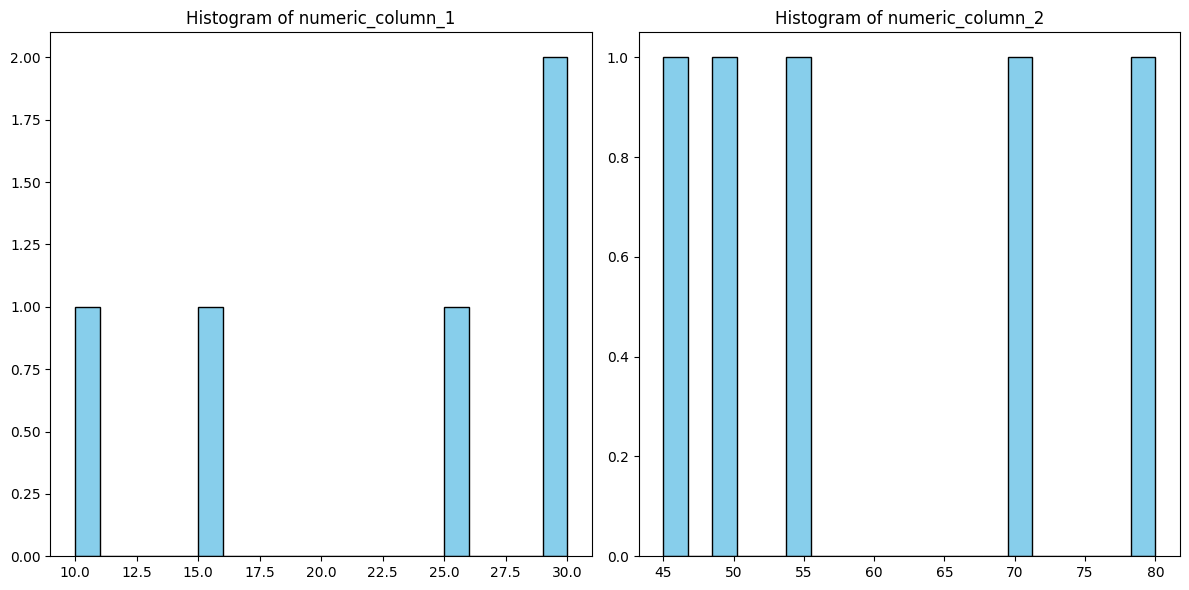

In [187]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns_to_visualize, 1):
    plt.subplot(1, len(numeric_columns_to_visualize), i)
    plt.hist(data[column], bins=20, edgecolor='black', color='skyblue')
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

Bar chart

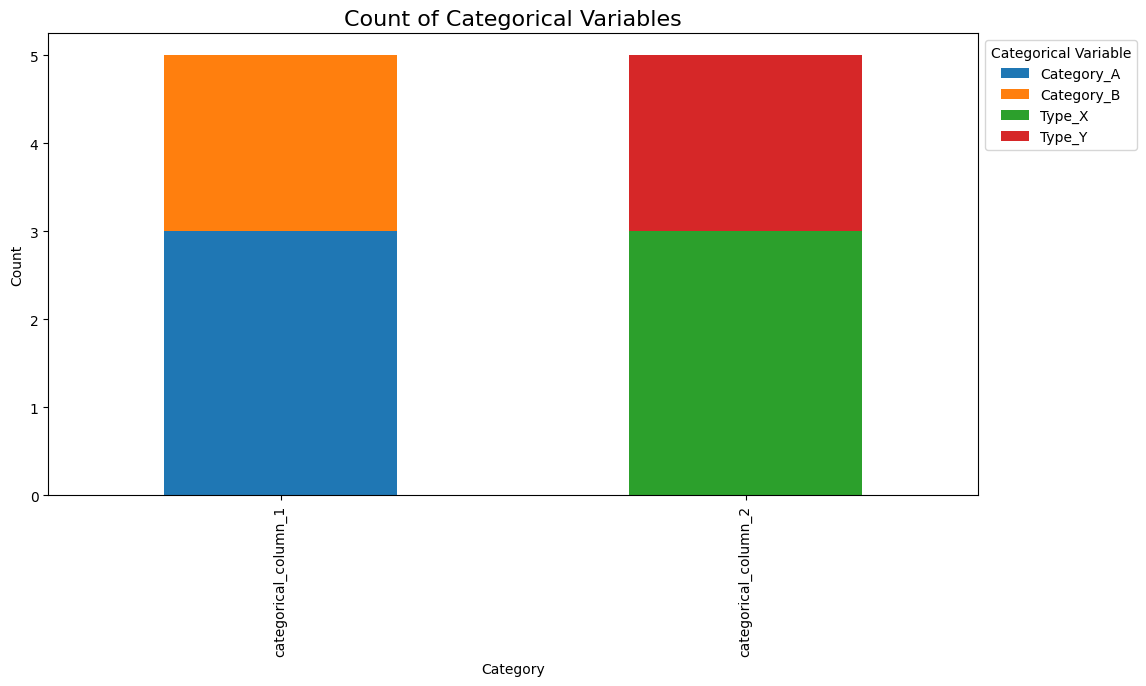

In [184]:
df = pd.DataFrame({
    'categorical_column_1': ['Category_A', 'Category_B', 'Category_A', 'Category_A', 'Category_B'],
    'categorical_column_2': ['Type_X', 'Type_Y', 'Type_X', 'Type_Y', 'Type_X'],
    'categorical_column_3': ['Label_1', 'Label_2', 'Label_1', 'Label_3', 'Label_2'],
})

categorical_columns_to_visualize = ['categorical_column_1', 'categorical_column_2']
category_counts = df[categorical_columns_to_visualize].apply(pd.value_counts)
category_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Count of Categorical Variables', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Categorical Variable', bbox_to_anchor=(1, 1))

plt.show()

Box Plot

<function matplotlib.pyplot.show(close=None, block=None)>

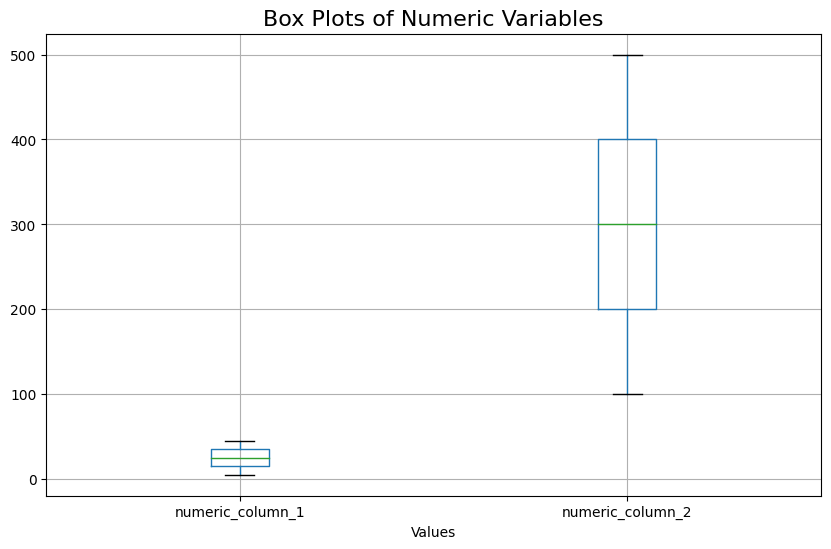

In [174]:
df = pd.DataFrame({
    'numeric_column_1': [5, 10, 15, 20, 25, 30, 35, 40, 45],
    'numeric_column_2': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'numeric_column_3': [10, 20, 30, 40, 50, 60, 70, 80, 90],
})
numeric_columns_to_visualize = ['numeric_column_1', 'numeric_column_2']
df[numeric_columns_to_visualize].boxplot(figsize=(10, 6))
plt.title('Box Plots of Numeric Variables', fontsize=16)
plt.xlabel('Values')
plt.show

pie chart

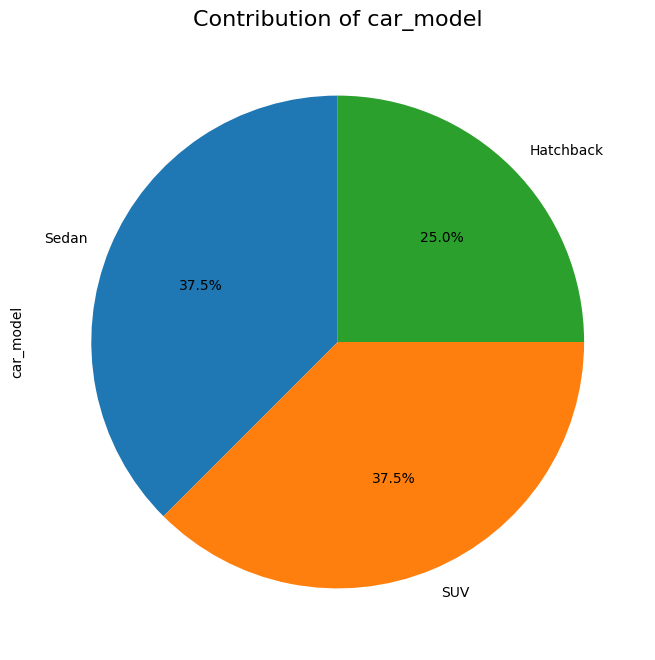

In [177]:
df = pd.DataFrame({
    'car_model': ['Sedan', 'SUV', 'Hatchback', 'Sedan', 'SUV', 'SUV', 'Hatchback', 'Sedan'],
    'manufacturer': ['Toyota', 'Honda', 'Ford', 'Toyota', 'Honda', 'Ford', 'Nissan', 'Toyota'],
    'color': ['Red', 'Blue', 'Black', 'White', 'Red', 'Blue', 'Black', 'White']
})

categorical_column_to_visualize = 'car_model'
category_contribution = df[categorical_column_to_visualize].value_counts()
category_contribution.plot.pie(autopct='%1.1f%%',startangle=90, figsize=(8, 8))
plt.title(f'Contribution of {categorical_column_to_visualize}', fontsize=16)
plt.show()

Count plot

In [179]:
data=pd.read_csv("/content/cars_ds_final.csv")

In [180]:
data.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

Text(0, 0.5, '')

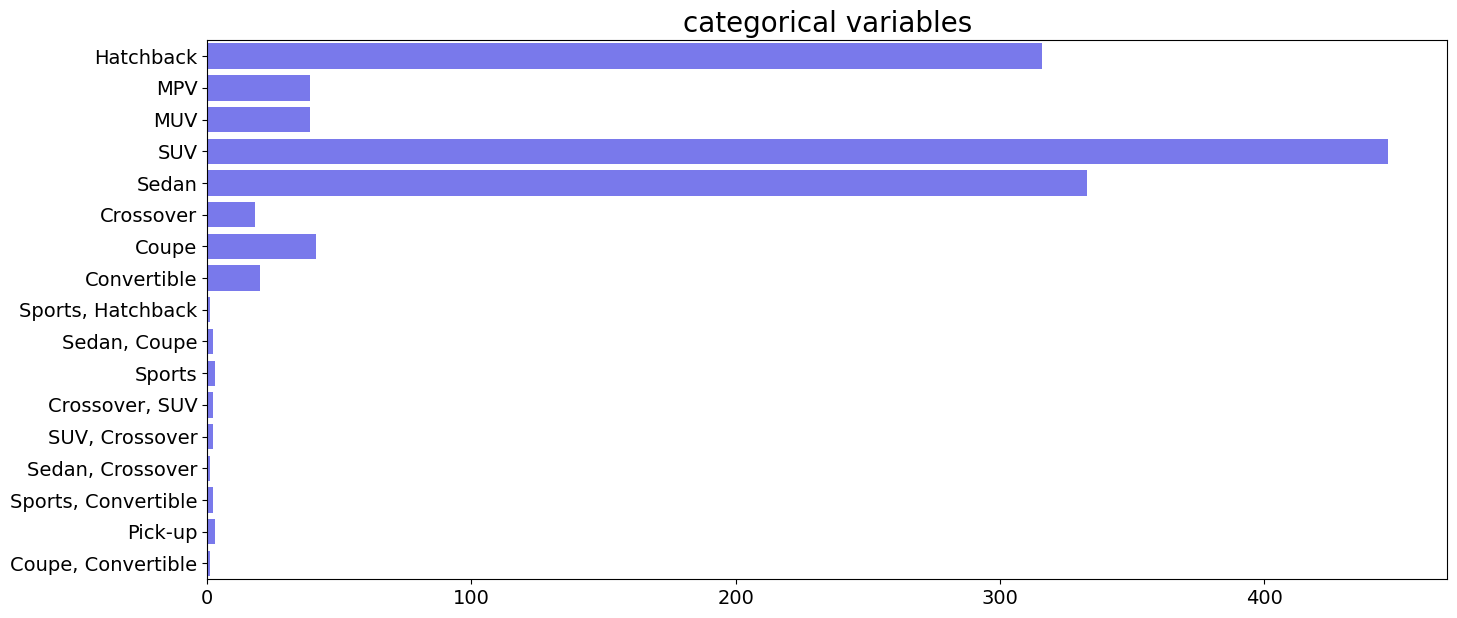

In [182]:
plt.figure(figsize=(16,7))
sns.countplot(data=data, y='Body_Type',alpha=.6,color='blue')
plt.title('categorical variables',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')